In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_classification

In [3]:
data = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X, y = data
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
print(model.score(X, y))

1.0


In [5]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', feature_names=['feature1', 'feature2'], class_names=['class0', 'class1'], rounded=True, filled=True)


In [8]:
import graphviz
with open('tree.dot', 'r') as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)
graph.render('tree', format='png', cleanup=True, view=True)

'tree.png'

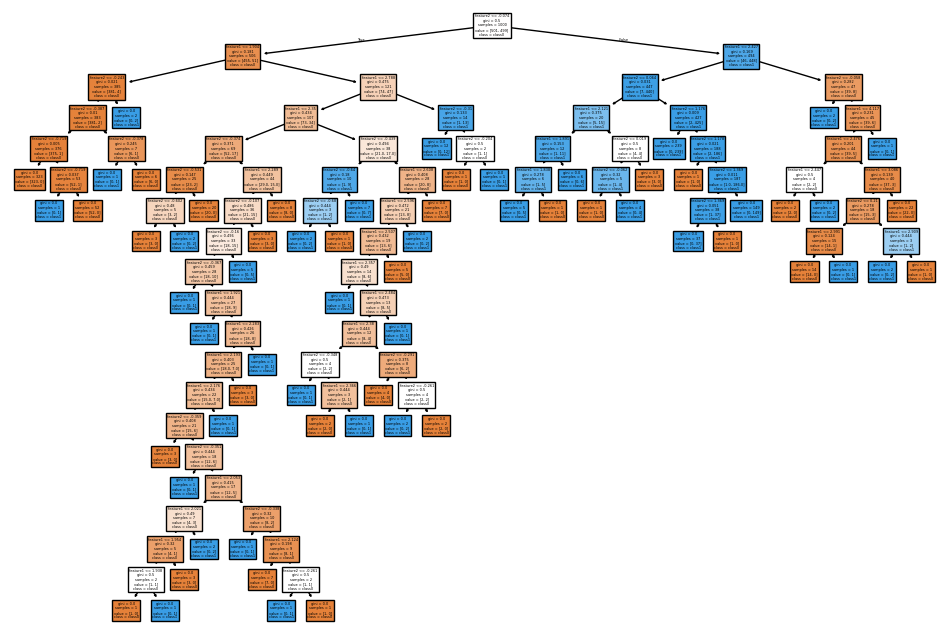

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['feature1', 'feature2'], class_names=['class0', 'class1'])
plt.savefig('tree_plot.png')
plt.show()

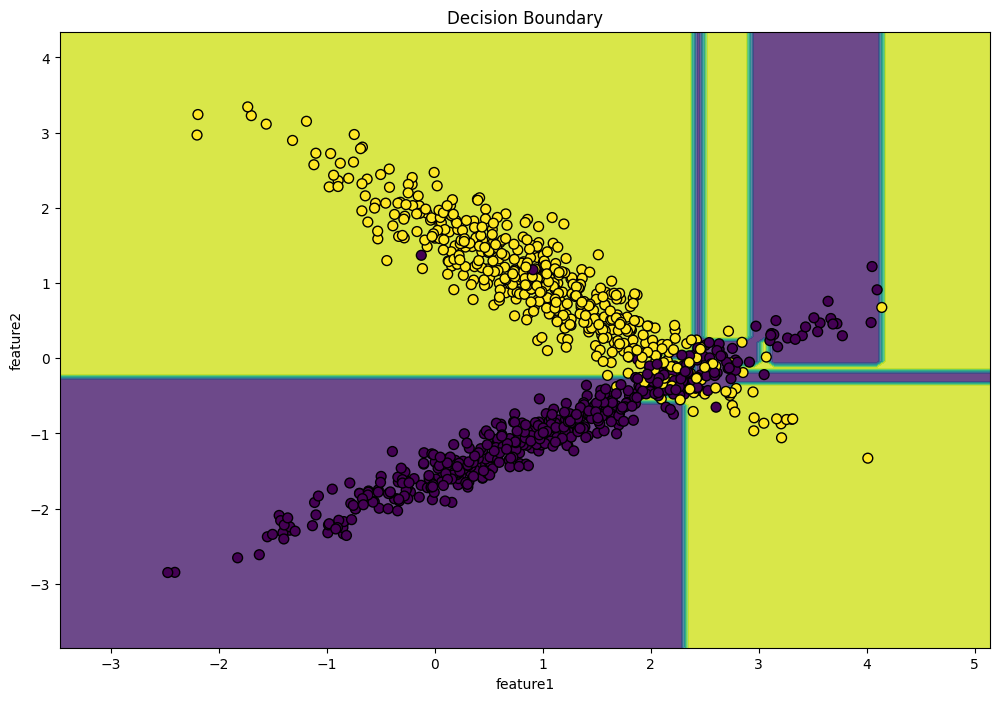

In [11]:
min_x, max_x = X[:, 0].min() - 1, X[:, 0].max() + 1
min_y, max_y = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(min_x, max_x, 100), 
                      np.linspace(min_y, max_y, 100))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('Decision Boundary')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.show()